# Problem Statement :
<pre>You are working for a new-age insurance company and employ mutiple 
outreach plans to sell term insurance to your customers. Telephonic marketing
campaigns still remain one of the most effective way to reach out to people 
however they incur a lot of cost. Hence, it is important to identify the
customers that are most likely to convert beforehand so that they can be
specifically targeted via call. We are given the historical marketing data 
of the insurance company and are required to build a ML model that will 
predict if a client will subscribe to the insurance.</pre> 



# ≣ Variables in the Dataset :
*   age (numeric)
*   job : type of job
*   marital : marital status
*   educational_qual : education status
*   call_type : contact communication type
*   day: last contact day of the month (numeric)
*   mon: last contact month of year
*   dur: last contact duration, in seconds (numeric)
*   num_calls: number of contacts performed during this campaign and for this client 
*   prev_outcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
*   Output variable (desired target):
*   y - has the client subscribed to the insurance


## Importing necessary libraries

In [ ]:
# for data reading and data manipulation
import pandas as pd
import numpy as np
import statistics as st

# for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# reading data from a .csv file to a Pandas DataFrame
df = pd.read_csv("train.csv")

In [ ]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [ ]:
df.sample(10)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
40704,45,admin.,married,secondary,cellular,7,aug,292,1,unknown,no
30183,33,blue-collar,single,secondary,cellular,5,feb,173,1,unknown,no
40571,75,retired,married,secondary,telephone,15,jul,219,2,unknown,no
19081,38,management,single,tertiary,cellular,5,aug,231,1,unknown,no
31221,63,self-employed,married,tertiary,cellular,2,mar,56,2,unknown,no
16154,50,housemaid,divorced,primary,cellular,22,jul,184,4,unknown,no
32445,42,admin.,married,secondary,cellular,16,apr,466,4,unknown,no
7220,51,technician,married,secondary,unknown,29,may,118,1,unknown,no
16139,37,admin.,married,secondary,cellular,22,jul,139,3,unknown,no
36591,31,blue-collar,married,secondary,cellular,12,may,137,1,unknown,no


In [ ]:

df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

As the name of the columns all are in same format that is in small letter so no need to change it

In [ ]:
df.shape

(45211, 11)

## Data Type Correction 

In [ ]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

<pre>It is observed that the data-type of columns are exactly the right
data-type suitable for those corresponding columns.so no need to convert the
data types</pre>

## Checking and Handling Missing Values 
    Checking for missing values

In [ ]:
# looking for the amount of null data in the pandas dataframe
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

   Handling missing values.
   As there is no missing values in the data. we cannot do any data preprocessing trchniques to full fill the data 

## Data Visualization.

## Univariate Analysis

In [ ]:
df["age"].value_counts()

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

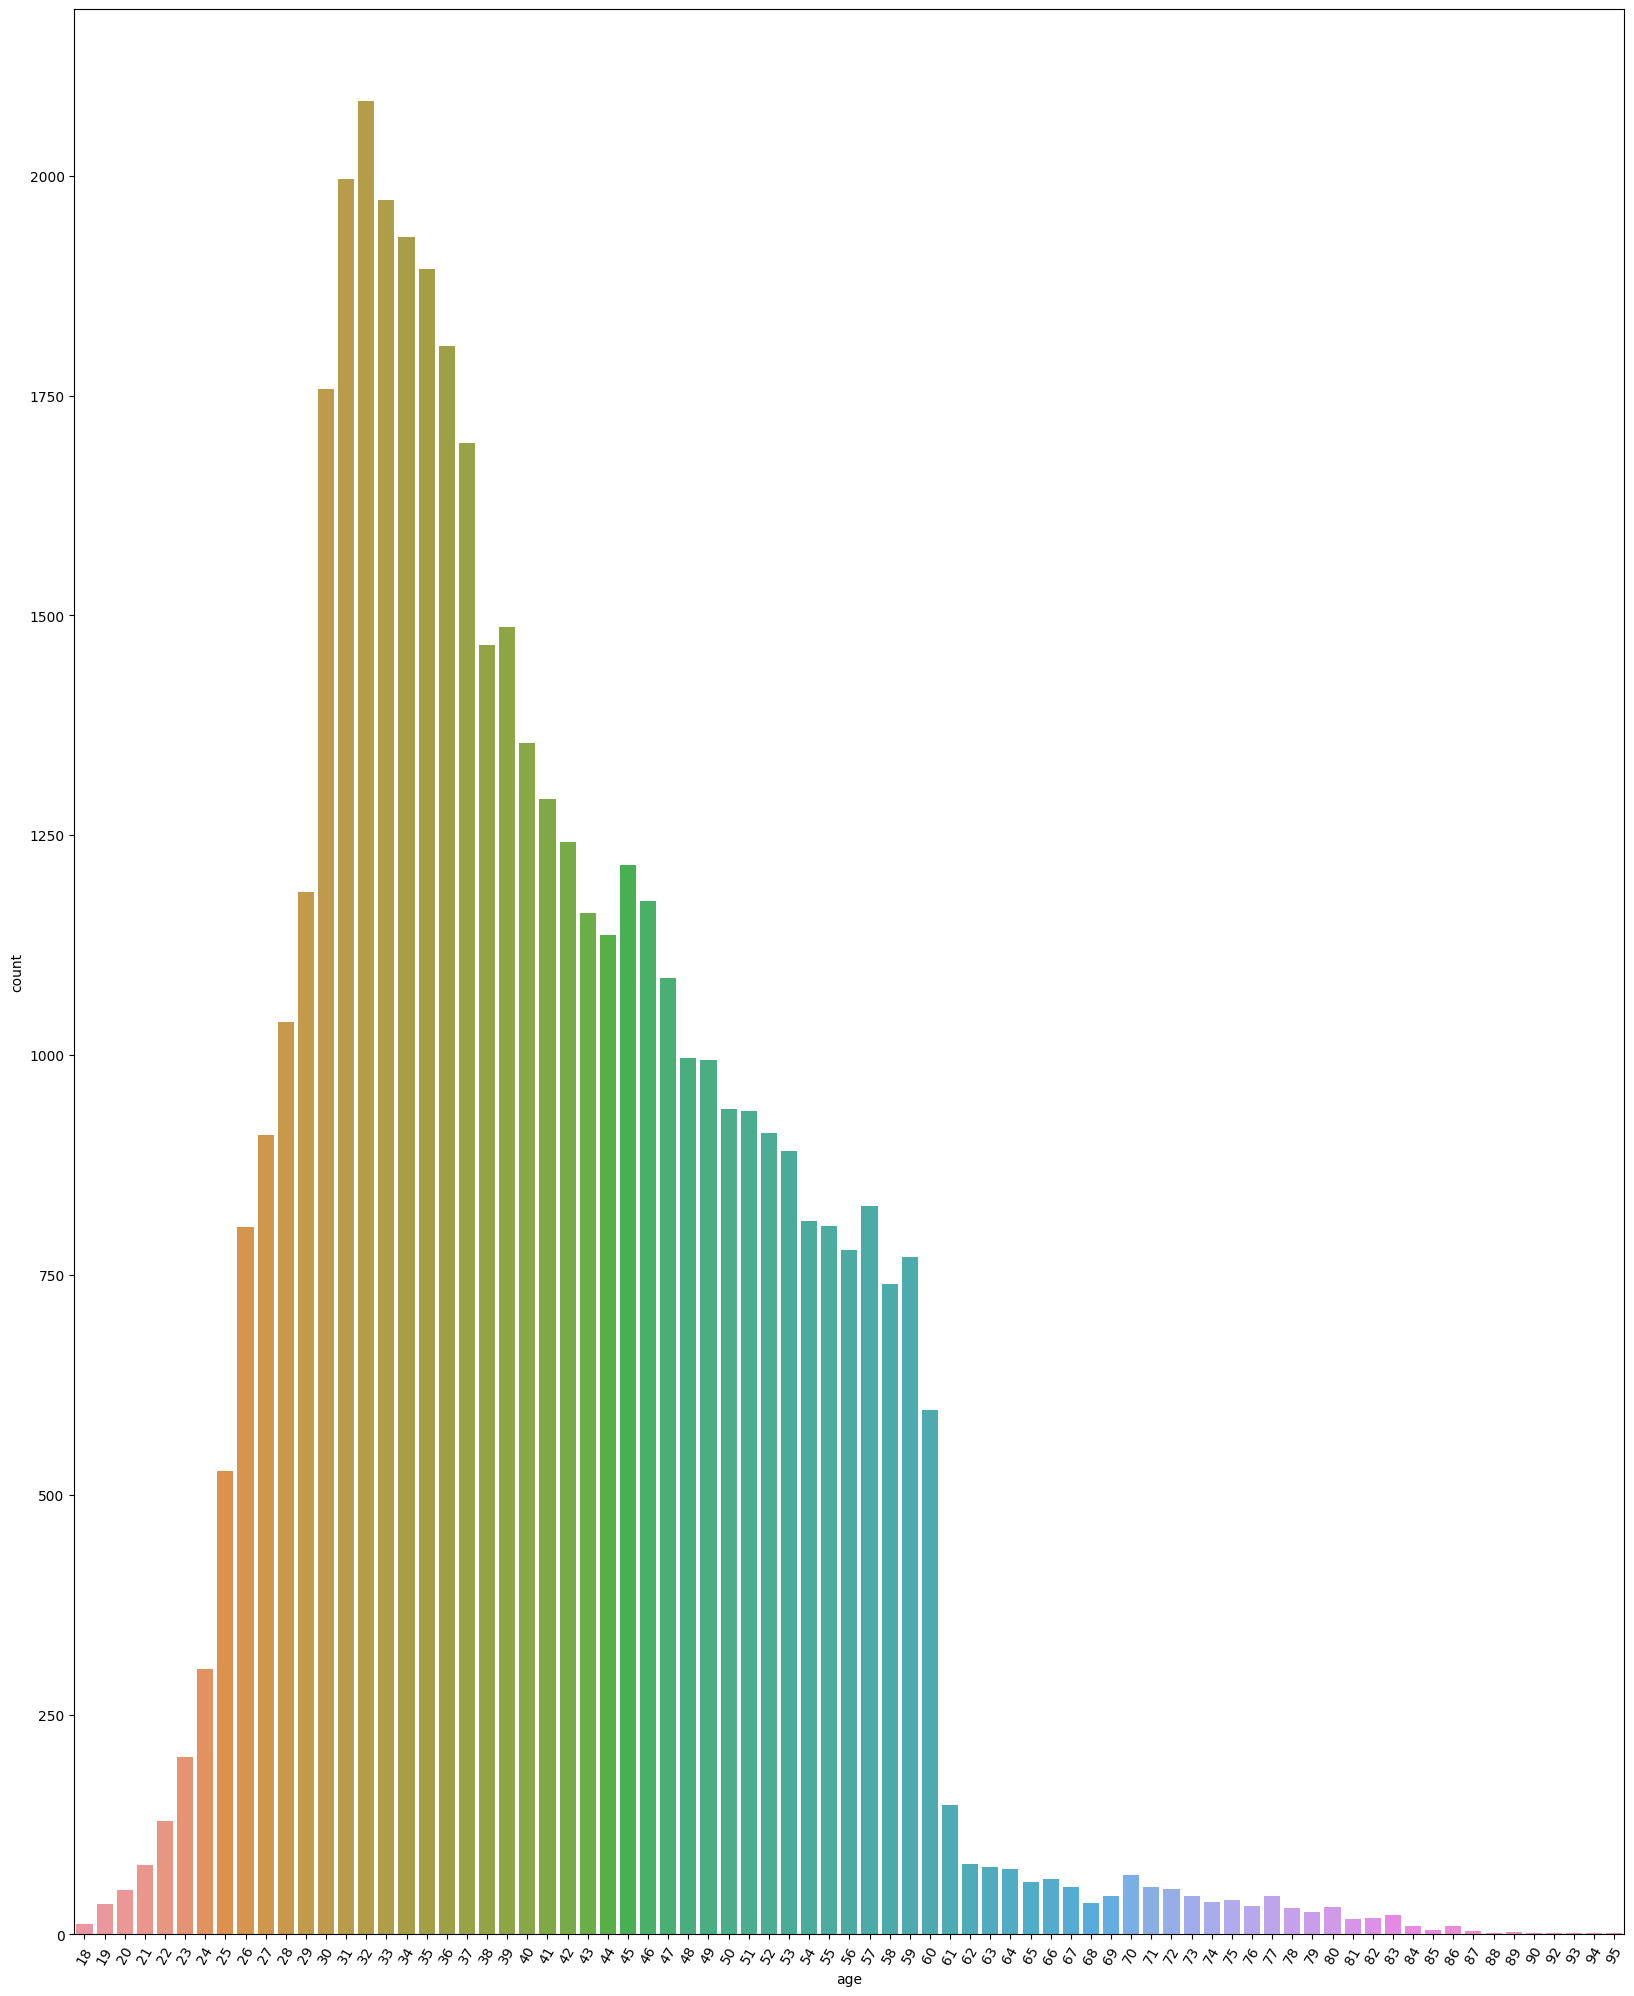

In [ ]:
plt.figure(figsize = (20,25))
sns.countplot(x = df["age"])
plt.xticks(rotation = 60)
plt.show()

In [ ]:
df["job"].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

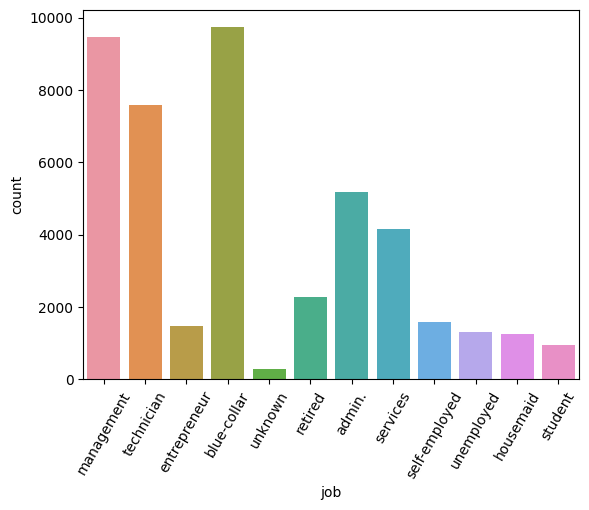

In [ ]:
sns.countplot(x = df["job"])
plt.xticks(rotation = 60)
plt.show()

In [ ]:
df["marital"].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

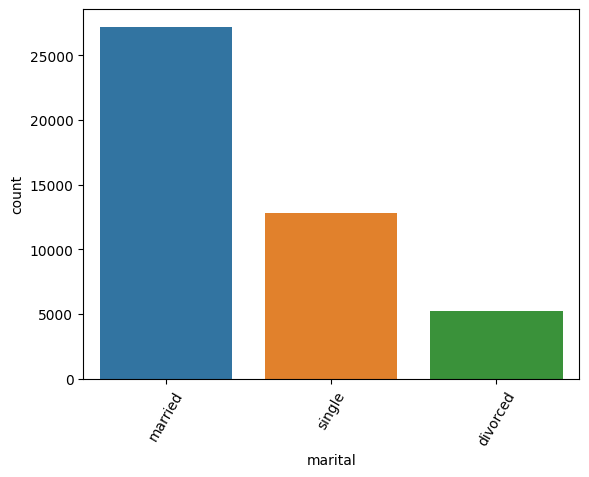

In [ ]:
sns.countplot(x = df["marital"])
plt.xticks(rotation = 60)
plt.show()

In [ ]:
df["education_qual"].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education_qual, dtype: int64

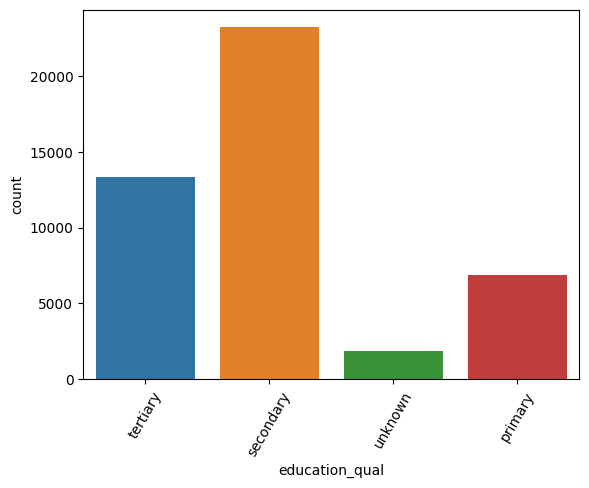

In [ ]:



sns.countplot(x = df["education_qual"])
plt.xticks(rotation = 60)
plt.show()

In [ ]:
df["call_type"].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: call_type, dtype: int64

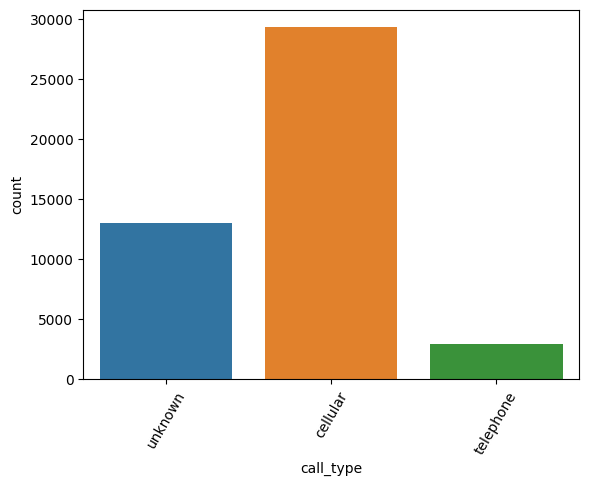

In [ ]:

sns.countplot(x = df["call_type"])
plt.xticks(rotation = 60)
plt.show()

In [ ]:


df["day"].value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

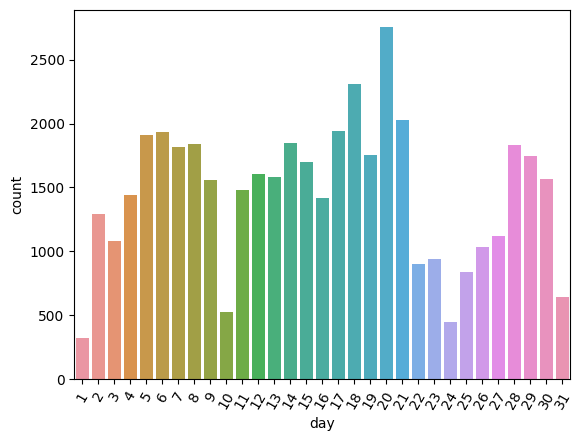

In [ ]:

sns.countplot(x = df["day"])
plt.xticks(rotation = 60)
plt.show()

In [ ]:
df["mon"].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

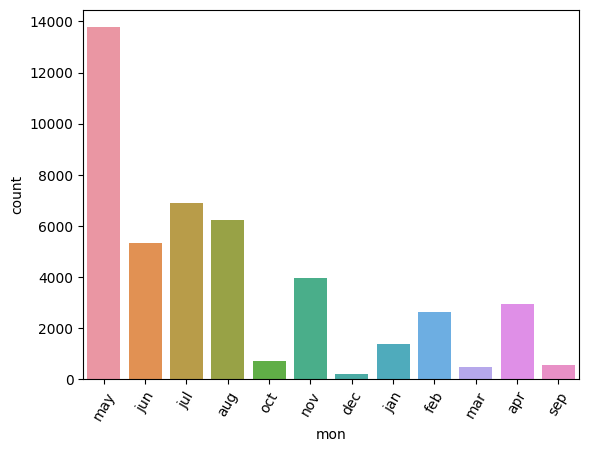

In [ ]:
sns.countplot(x = df["mon"])
plt.xticks(rotation = 60)
plt.show()

In [ ]:
df["dur"].value_counts()

124     188
90      184
89      177
104     175
122     175
       ... 
1833      1
1545      1
1352      1
1342      1
1556      1
Name: dur, Length: 1573, dtype: int64

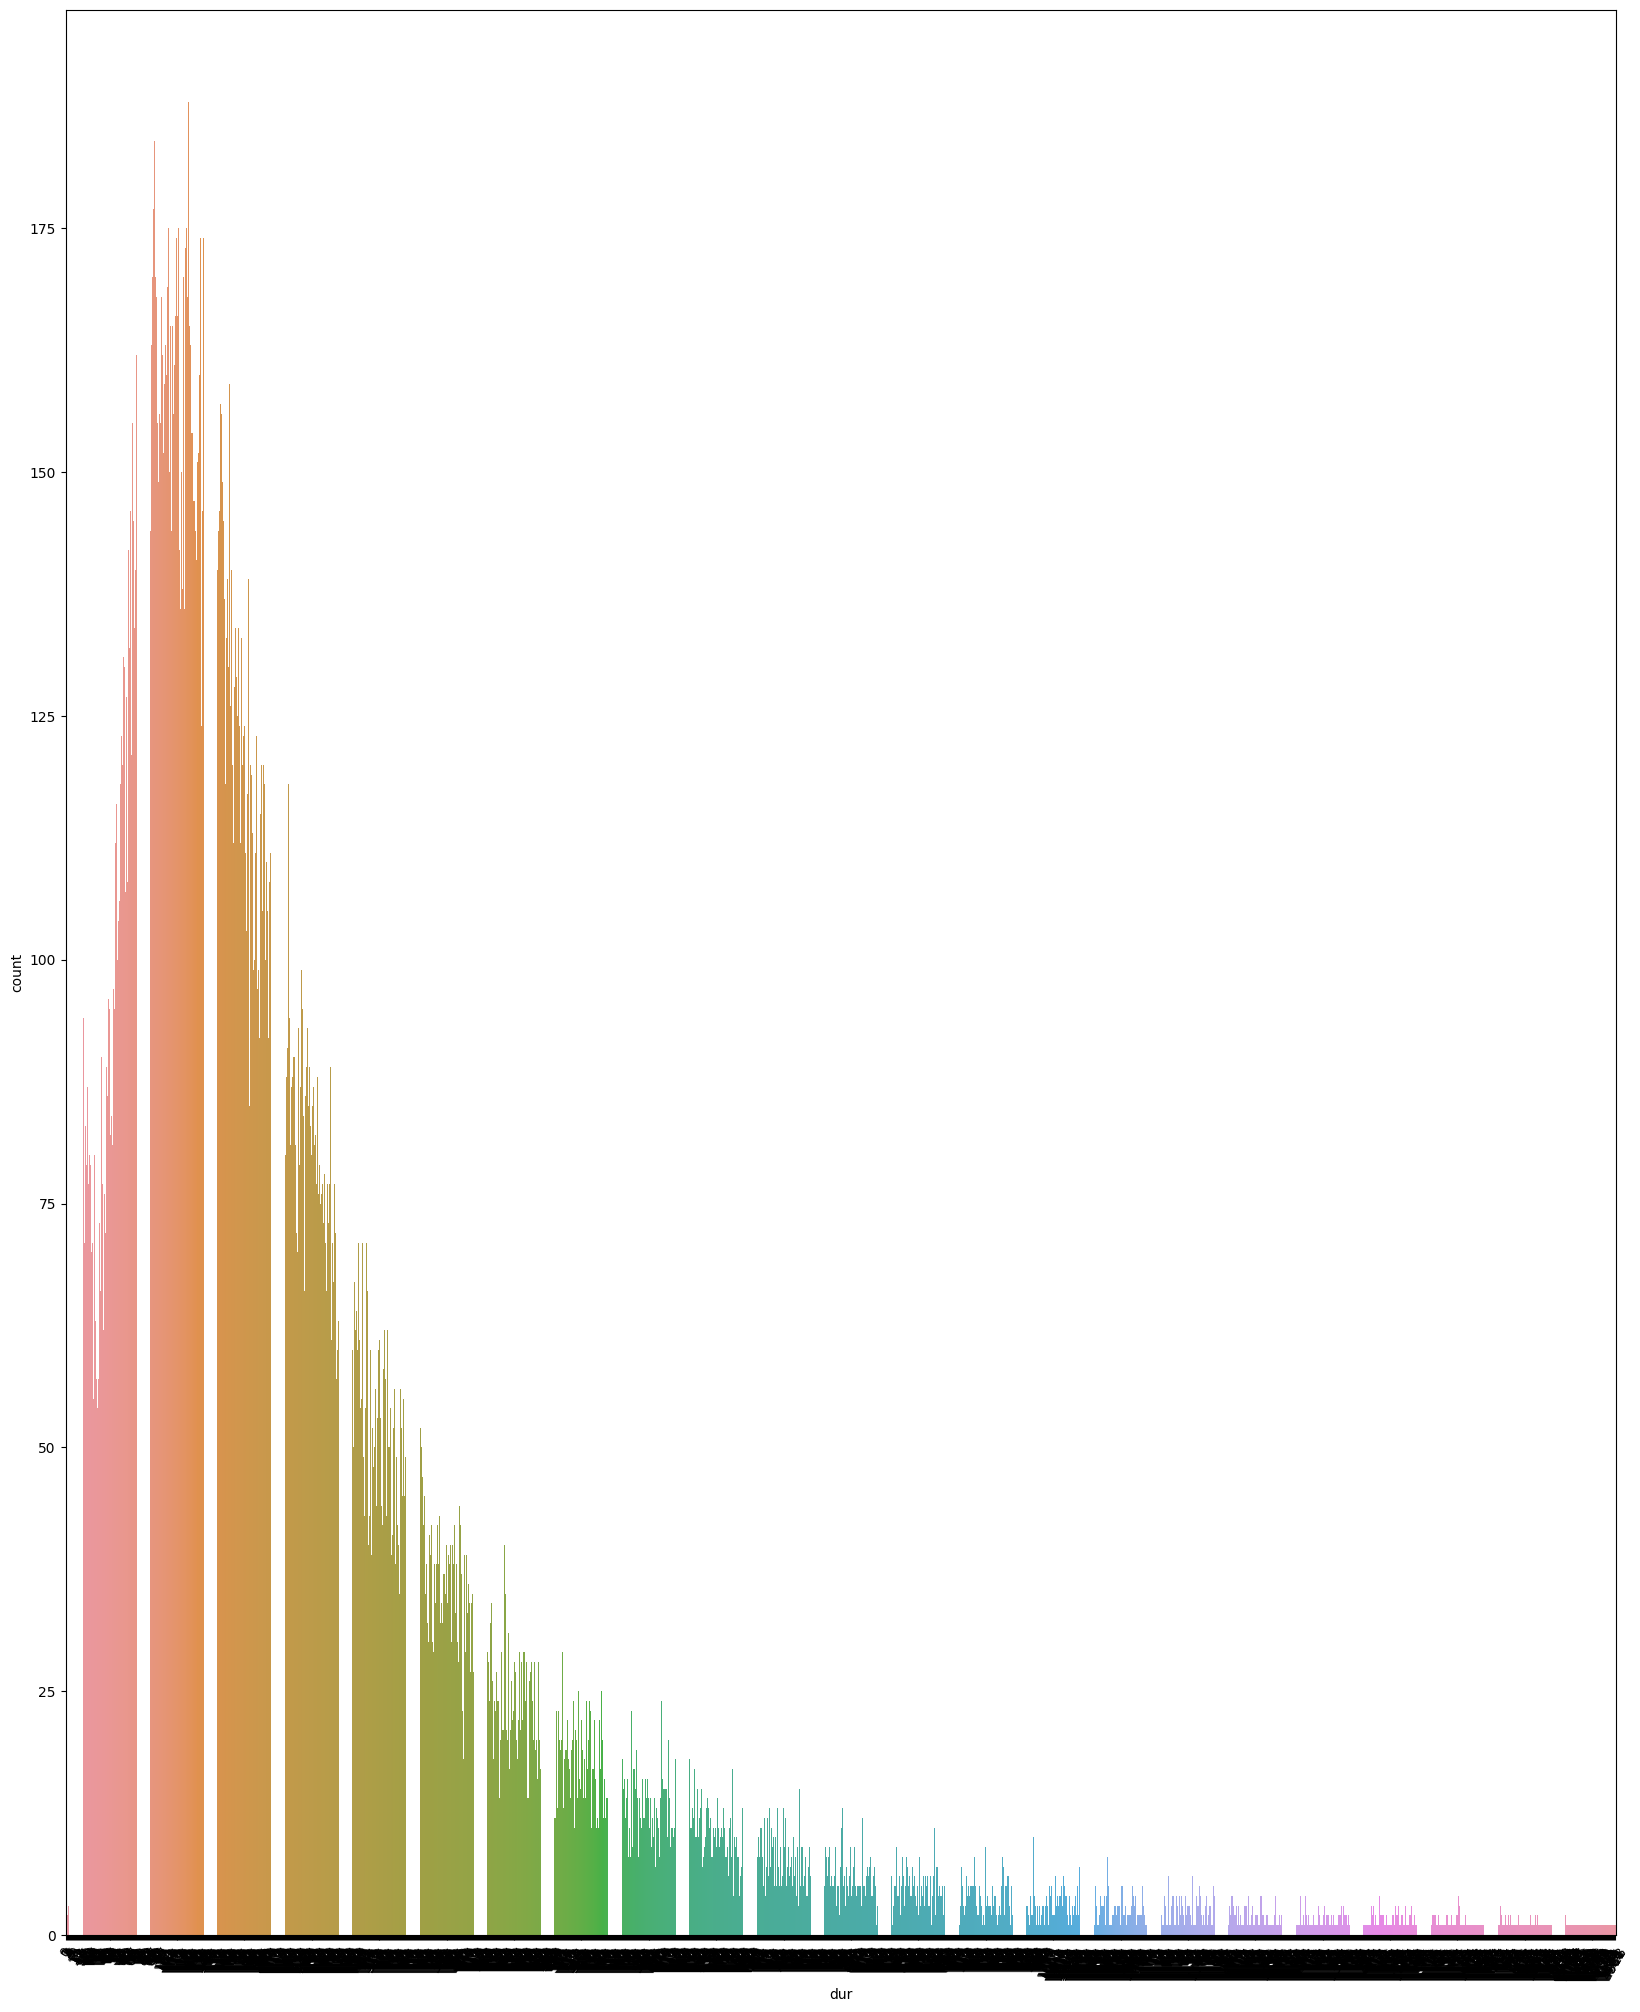

In [ ]:
plt.figure(figsize = (20,25))
sns.countplot(x = df["dur"])
plt.xticks(rotation = 60)
plt.show()

In [ ]:
df["num_calls"].value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: num_calls, dtype: int64

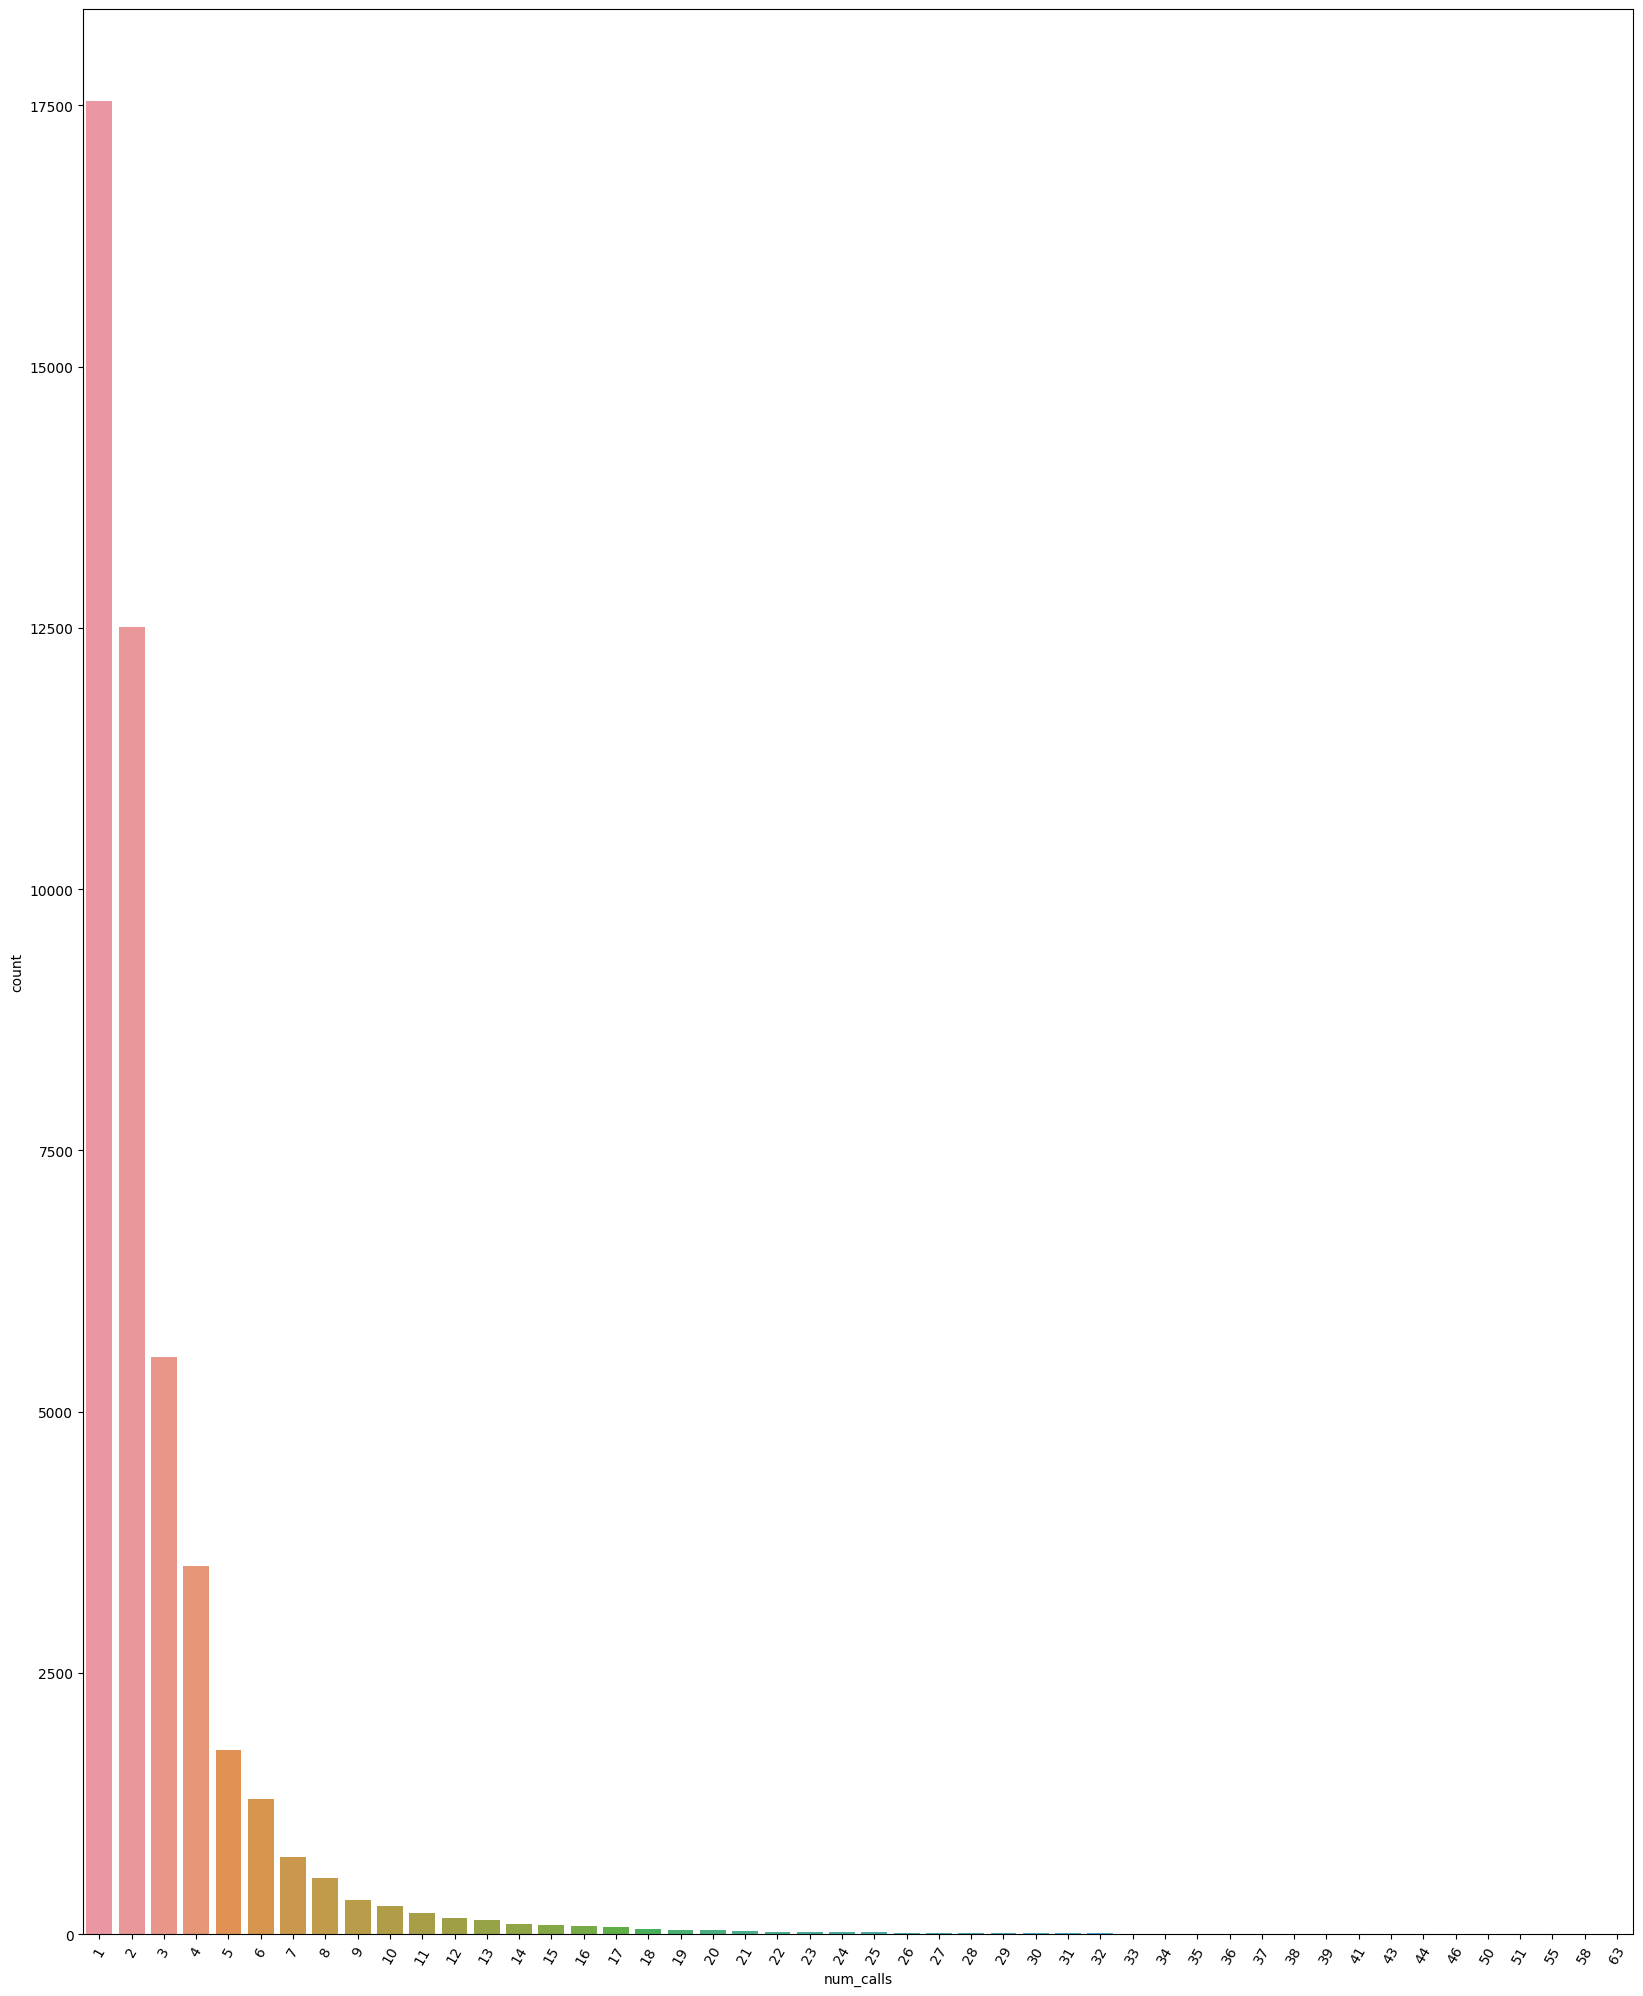

In [ ]:
plt.figure(figsize = (20,25))
sns.countplot(x = df["num_calls"])
plt.xticks(rotation = 60)
plt.show()

In [ ]:
df["prev_outcome"].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

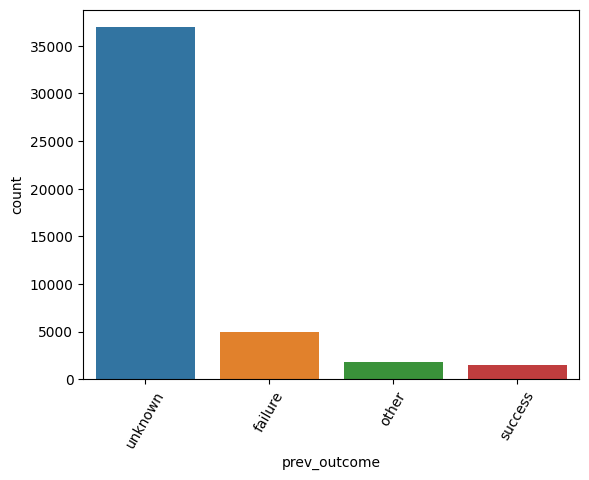

In [ ]:
sns.countplot(x = df["prev_outcome"])
plt.xticks(rotation = 60)
plt.show()

In [ ]:
df["y"].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

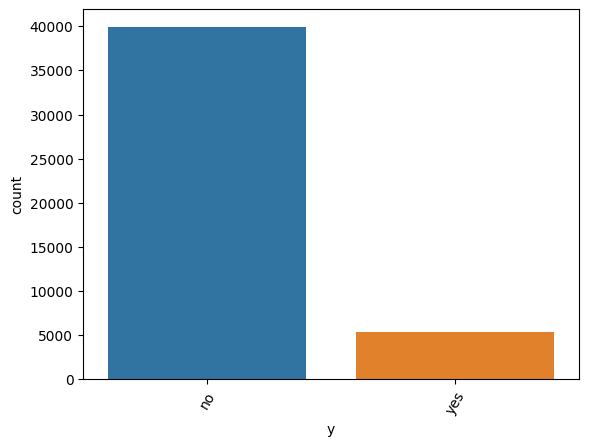

In [ ]:
sns.countplot(x = df["y"])
plt.xticks(rotation = 60)
plt.show()

## Checking for outliers

Text(0.5, 1.0, 'num_calls')

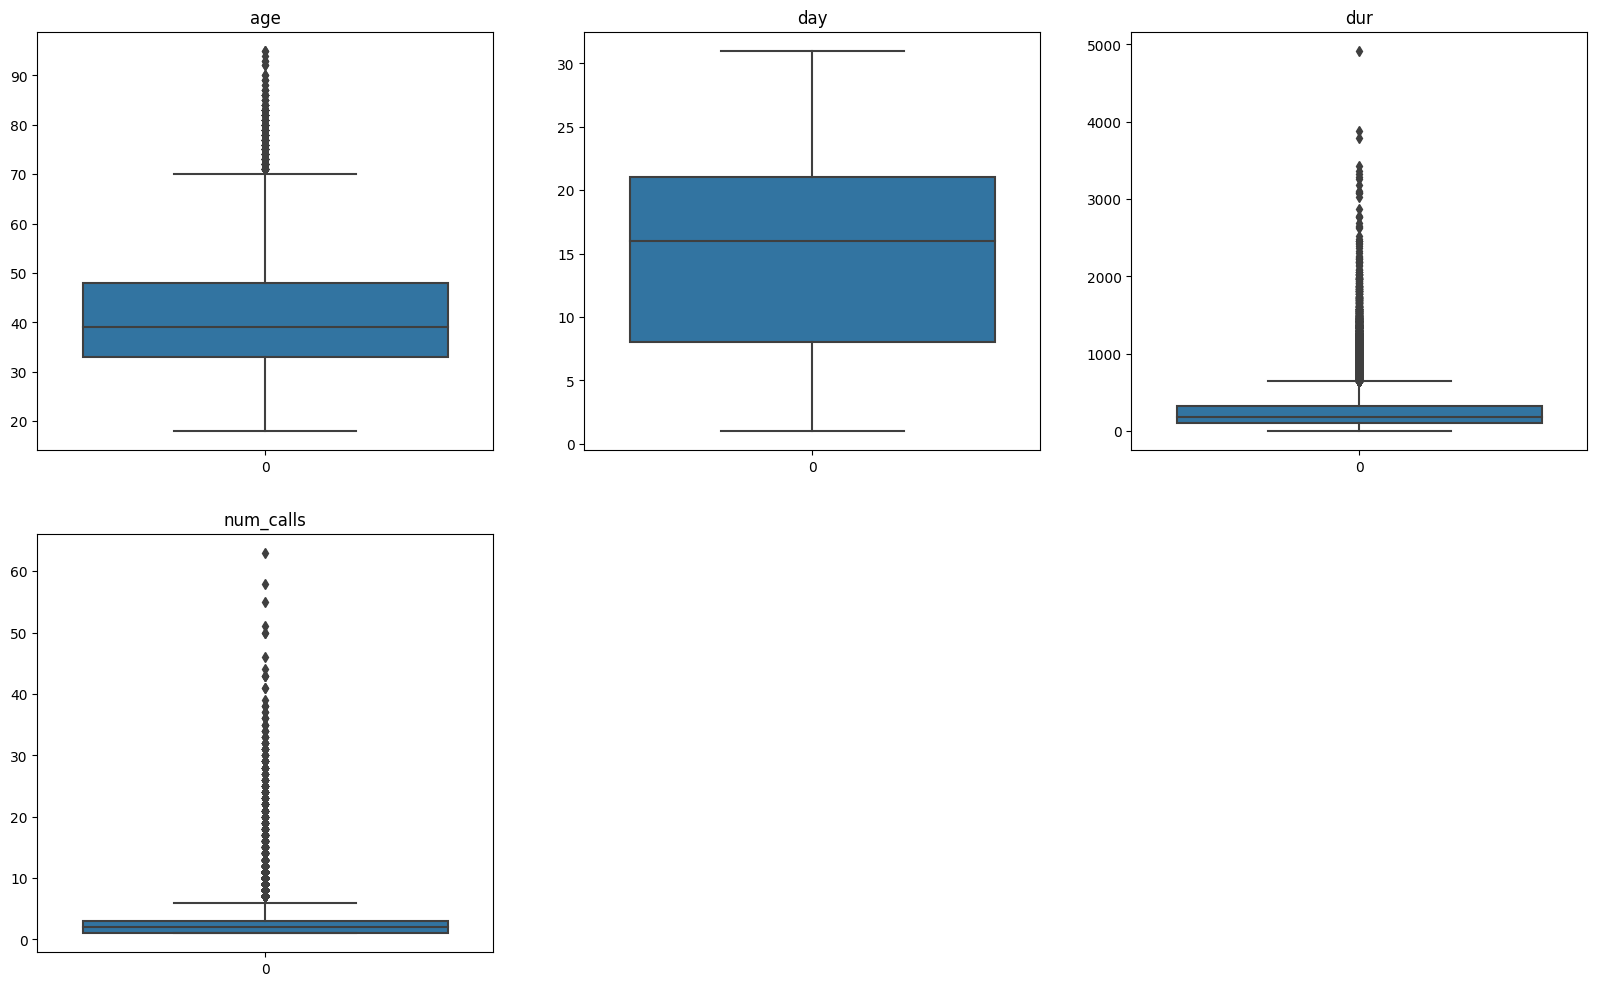

In [ ]:
plt.figure(figsize = (20,25))
plt.subplot(431)
sns.boxplot(df["age"])
plt.title("age")

plt.subplot(432)
sns.boxplot(df["day"])
plt.title("day")

plt.subplot(433)
sns.boxplot(df["dur"])
plt.title("dur")

plt.subplot(434)
sns.boxplot(df["num_calls"])
plt.title("num_calls")


<pre>Although there is missing values in data , there is no need to remove it 
beacuse that outliers are important to data</pre>

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(45205, 11)

Text(0.5, 1.0, 'prev_outcome vs count')

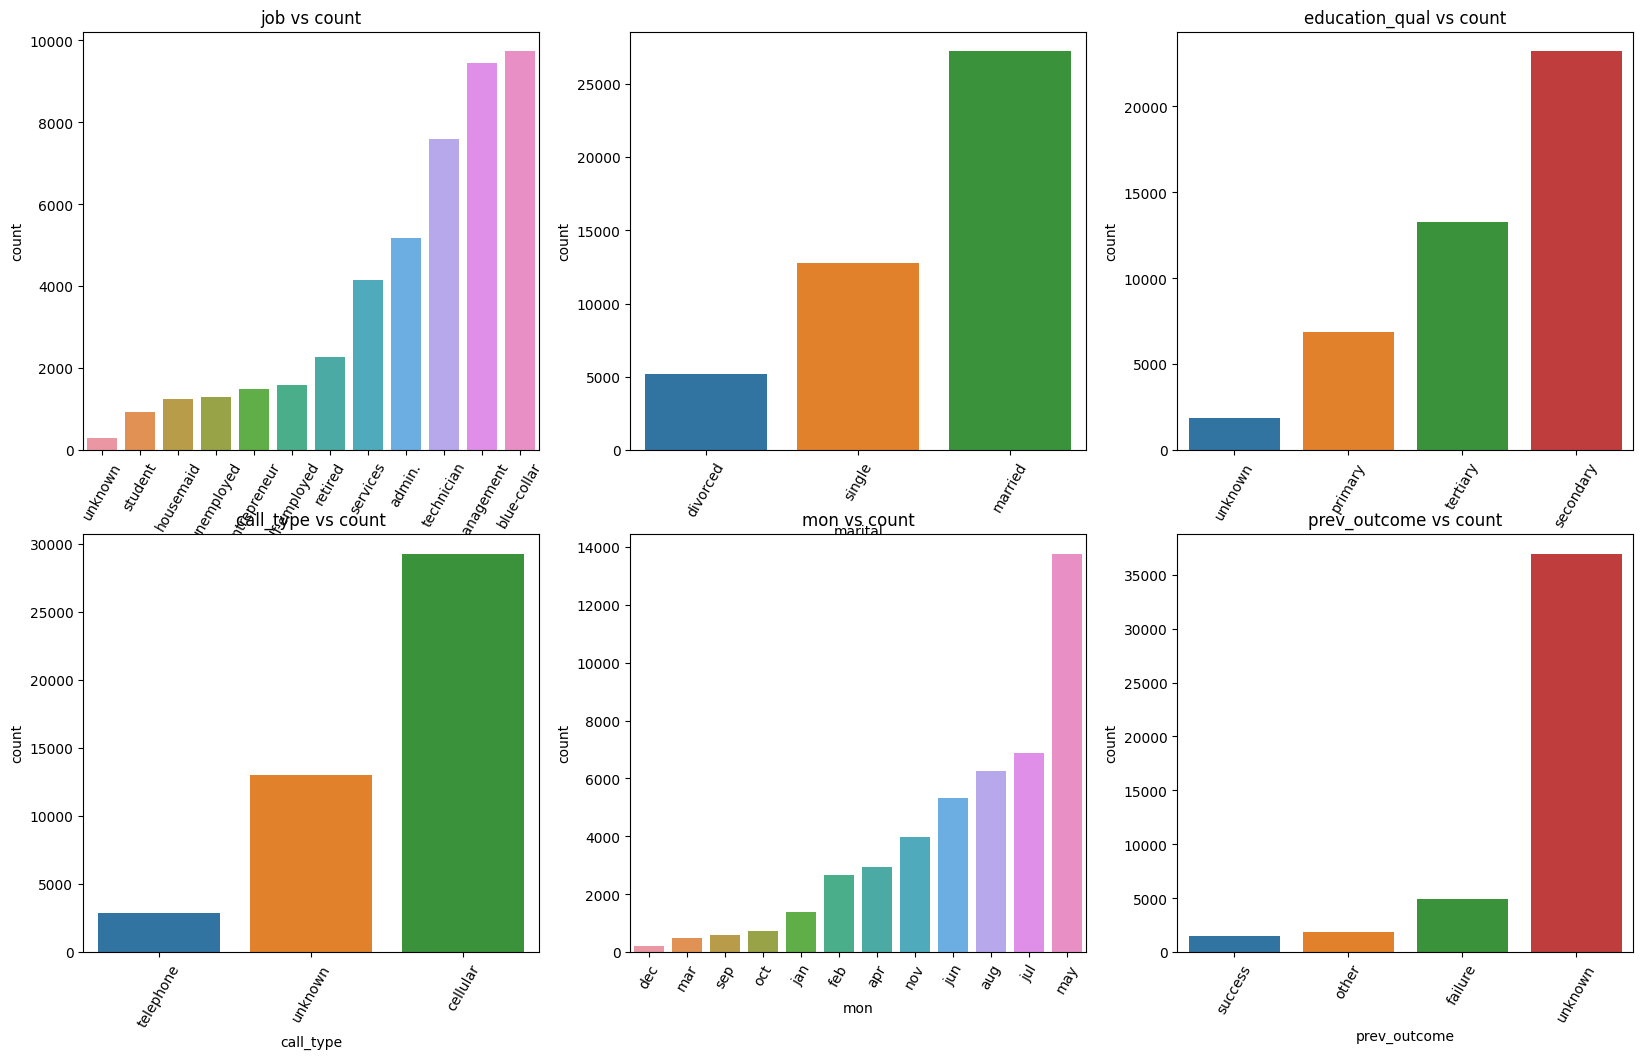

In [ ]:
plt.figure(figsize = (20,25))


plt.subplot(431)
sns.countplot(x = df["job"], order = df["job"].value_counts().index[::-1])
plt.xticks(rotation = 60)
plt.title("job vs count")


plt.subplot(432)
sns.countplot(x = df["marital"], order = df["marital"].value_counts().index[::-1])
plt.xticks(rotation = 60)



plt.subplot(433)
sns.countplot(x = df["education_qual"], order = df["education_qual"].value_counts().index[::-1])
plt.xticks(rotation = 60)
plt.title("education_qual vs count")


plt.subplot(434)
sns.countplot(x = df["call_type"], order = df["call_type"].value_counts().index[::-1])
plt.xticks(rotation = 60)
plt.title("call_type vs count")


plt.subplot(435)
sns.countplot(x = df["mon"], order = df["mon"].value_counts().index[::-1])
plt.xticks(rotation = 60)
plt.title("mon vs count")



plt.subplot(436)
sns.countplot(x = df["prev_outcome"], order = df["prev_outcome"].value_counts().index[::-1])
plt.xticks(rotation = 60)
plt.title("prev_outcome vs count")


<pre> we do above data in ascending order so that we will encode the data 
easily according to that </pre> 

## Bivariate Analysis

Text(0.5, 1.0, 'prev_outcome vs y')

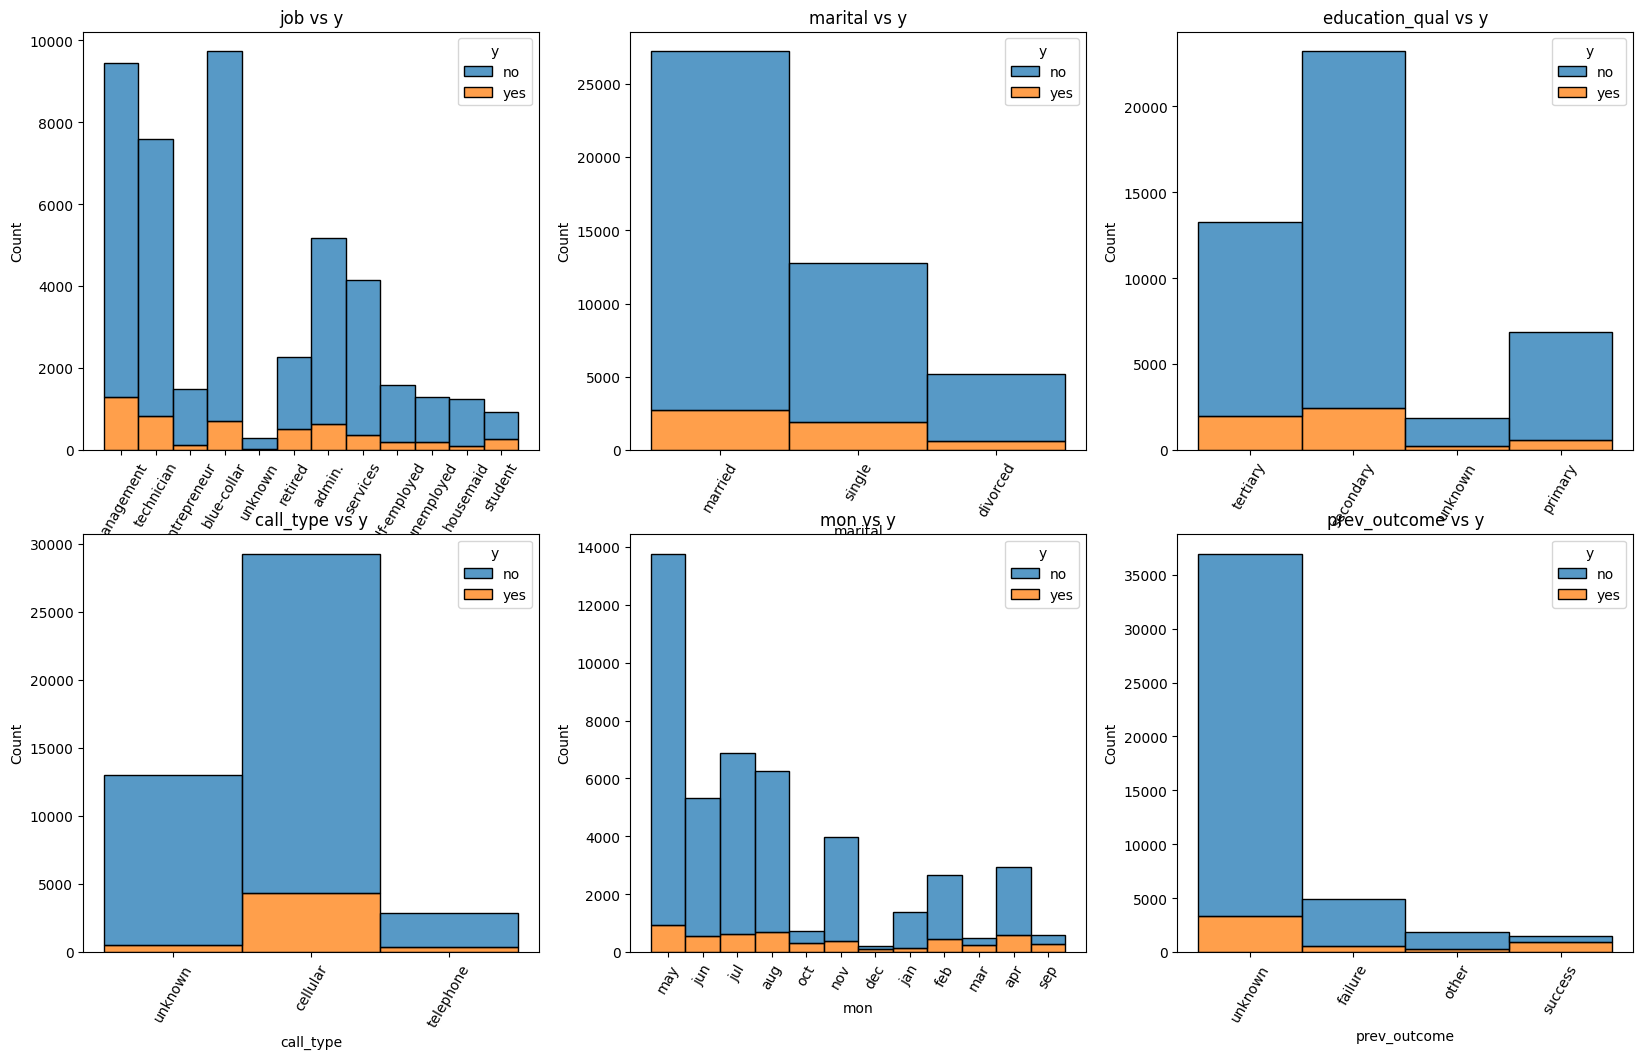

In [ ]:
plt.figure(figsize = (20,25))

plt.subplot(431)
sns.histplot(data = df, x = df["job"], hue = df["y"], multiple = "stack")
plt.xticks(rotation = 60)
plt.title("job vs y")


plt.subplot(432)
sns.histplot(data = df, x = df["marital"], hue = df["y"], multiple = "stack")
plt.xticks(rotation = 60)
plt.title("marital vs y")

plt.subplot(433)
sns.histplot(data = df, x = df["education_qual"], hue = df["y"], multiple = "stack")
plt.xticks(rotation = 60)
plt.title("education_qual vs y")

plt.subplot(434)
sns.histplot(data = df, x = df["call_type"], hue = df["y"], multiple = "stack")
plt.xticks(rotation = 60)
plt.title("call_type vs y")

plt.subplot(435)
sns.histplot(data = df, x = df["mon"], hue = df["y"], multiple = "stack")
plt.xticks(rotation = 60)
plt.title("mon vs y")

plt.subplot(436)
sns.histplot(data = df, x = df["prev_outcome"], hue = df["y"], multiple = "stack")
plt.xticks(rotation = 60)
plt.title("prev_outcome vs y")

##**ENCODING THE CATEGORICAL VARIABLES**
<pre> 1.for marital categorical feature we will do One Hot Encoding </pre>
<pre> 2.for job categorical feature we will do Ordinal Encoding </pre>
<pre>3.for education_qual categorical feature we will do Ordinal Encoding </pre>
<pre>4.for call_type categorical feature we will do One Hot Encoding </pre>
<pre>5.for mon categorical feature we will do Ordinal Encoding </pre>
<pre>6.for prev_outcome categorical feature we will do One Hot Encoding </pre>


In [ ]:
ohe1 = pd.get_dummies(df[["marital"]])

In [ ]:
ohe1

,marital_divorced,marital_married,marital_single
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1
...,...,...,...
45206,0,1,0
45207,1,0,0
45208,0,1,0
45209,0,1,0


In [ ]:
ohe1 = pd.get_dummies(df[["marital"]])
df = df.drop("marital", axis = 1)
df = pd.concat([df, ohe1], axis=1)

In [ ]:
df.head()

,age,job,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,marital_divorced,marital_married,marital_single
0,58,management,tertiary,unknown,5,may,261,1,unknown,no,0,1,0
1,44,technician,secondary,unknown,5,may,151,1,unknown,no,0,0,1
2,33,entrepreneur,secondary,unknown,5,may,76,1,unknown,no,0,1,0
3,47,blue-collar,unknown,unknown,5,may,92,1,unknown,no,0,1,0
4,33,unknown,unknown,unknown,5,may,198,1,unknown,no,0,0,1


In [ ]:
df["job"] = df["job"].map({"unknown":0,"student":1,"housemaid":2,"unemployed":3,"entrepreneur":4,"self-employed":5,"retired":6,"services":7,"admin.":8,"technician":9,"management":10,"blue-collar":11})

In [ ]:
df["education_qual"] = df["education_qual"].map({"unknown":0,"primary":1,"tertiary":2,"secondary":3})

In [ ]:
ohe2 = pd.get_dummies(df[["call_type"]])
df = df.drop("call_type", axis = 1)
df = pd.concat([df, ohe2], axis=1)

In [ ]:
df["mon"] = df["mon"].map({"dec":0,"mar":1,"sep":2,"oct":3,"jan":4,"feb":5,"apr":6,"nov":7,"jun":8,"aug":9,"jul":10,"may":11})

In [ ]:
ohe3 = pd.get_dummies(df[["prev_outcome"]])
df = df.drop("prev_outcome", axis = 1)
df = pd.concat([df, ohe3], axis=1)

In [ ]:
df.head()

,age,job,education_qual,day,mon,dur,num_calls,y,marital_divorced,marital_married,marital_single,call_type_cellular,call_type_telephone,call_type_unknown,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58,10,2,5,11,261,1,no,0,1,0,0,0,1,0,0,0,1
1,44,9,3,5,11,151,1,no,0,0,1,0,0,1,0,0,0,1
2,33,4,3,5,11,76,1,no,0,1,0,0,0,1,0,0,0,1
3,47,11,0,5,11,92,1,no,0,1,0,0,0,1,0,0,0,1
4,33,0,0,5,11,198,1,no,0,0,1,0,0,1,0,0,0,1


In [ ]:
df["y"] = df["y"].map({"yes":1,"no":0})

In [ ]:
df.head()

,age,job,education_qual,day,mon,dur,num_calls,y,marital_divorced,marital_married,marital_single,call_type_cellular,call_type_telephone,call_type_unknown,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58,10,2,5,11,261,1,0,0,1,0,0,0,1,0,0,0,1
1,44,9,3,5,11,151,1,0,0,0,1,0,0,1,0,0,0,1
2,33,4,3,5,11,76,1,0,0,1,0,0,0,1,0,0,0,1
3,47,11,0,5,11,92,1,0,0,1,0,0,0,1,0,0,0,1
4,33,0,0,5,11,198,1,0,0,0,1,0,0,1,0,0,0,1


## Split the data into X : Features and y: Target Variable

In [ ]:
X = df.drop('y',axis=1)
y = df['y']

In [ ]:
X

,age,job,education_qual,day,mon,dur,num_calls,marital_divorced,marital_married,marital_single,call_type_cellular,call_type_telephone,call_type_unknown,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58,10,2,5,11,261,1,0,1,0,0,0,1,0,0,0,1
1,44,9,3,5,11,151,1,0,0,1,0,0,1,0,0,0,1
2,33,4,3,5,11,76,1,0,1,0,0,0,1,0,0,0,1
3,47,11,0,5,11,92,1,0,1,0,0,0,1,0,0,0,1
4,33,0,0,5,11,198,1,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,2,17,7,977,3,0,1,0,1,0,0,0,0,0,1
45207,71,6,1,17,7,456,2,1,0,0,1,0,0,0,0,0,1
45208,72,6,3,17,7,1127,5,0,1,0,1,0,0,0,0,1,0
45209,57,11,3,17,7,508,4,0,1,0,0,1,0,0,0,0,1


In [ ]:
X.value_counts()

age  job  education_qual  day  mon  dur  num_calls  marital_divorced  marital_married  marital_single  call_type_cellular  call_type_telephone  call_type_unknown  prev_outcome_failure  prev_outcome_other  prev_outcome_success  prev_outcome_unknown
18   1    0               1    2    425  1          0                 0                1               1                   0                    0                  0                     0                   0                     1                       1
45   9    3               30   6    73   2          0                 1                0               1                   0                    0                  1                     0                   0                     0                       1
                          17   7    483  1          0                 1                0               1                   0                    0                  1                     0                   0                     0                  

In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45205, dtype: int64

In [ ]:
y.value_counts()

0    39916
1     5289
Name: y, dtype: int64

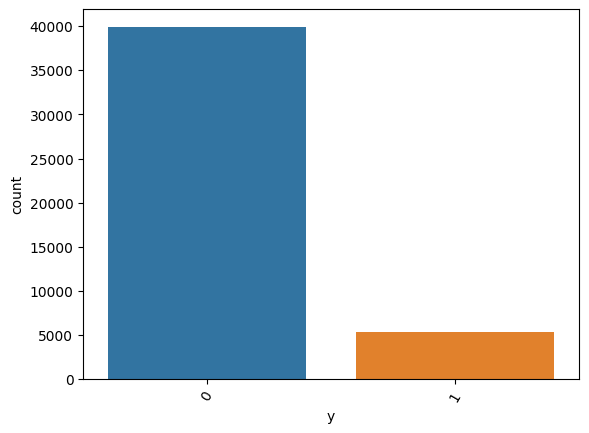

In [ ]:
sns.countplot(x = df["y"])
plt.xticks(rotation = 60)
plt.show()

and then into splitting the data into training and testing sets with the ratio of 8:2

In [ ]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
63895    1
63896    1
63897    1
63898    1
63899    1
Name: y, Length: 63900, dtype: int64

In [ ]:
y_test

31109    1
19819    0
29495    0
16087    0
14239    0
        ..
31141    0
6654     0
18689    0
9027     0
27549    0
Name: y, Length: 9041, dtype: int64

In [ ]:
print(y_train.value_counts())

0    31950
1    31950
Name: y, dtype: int64


In [ ]:
print(y_test.value_counts())

0    7966
1    1075
Name: y, dtype: int64


<pre>The data in the y_train is not balancing in nature. It is imbalanced data.
so we will do oversampling to balance the data. we will use SMOTE method in 
oversampling to balance the data </pre>

In [ ]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smote , y_smote = smote.fit_resample(X_train, y_train)

In [ ]:
X_train = X_smote.copy()
y_train = y_smote.copy()

##**Building Machine Learning Model**

###**Logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression() 
lrc.fit(X_train , y_train)
y_pred_lrc = lrc.predict(X_test)

###**Metrics in Logistic regression**

In [ ]:
testing_score_lrc = lrc.score(X_test, y_test) #accuracy
print("testing score for logistic regression :",testing_score_lrc)
training_score_lrc = lrc.score(X_train, y_train)
print("training score for logistic regression :",training_score_lrc)
from sklearn.model_selection import cross_val_score
cross_val_score_lrc = cross_val_score(lrc,X_train,y_train,cv=10).mean()
print("cross_val_score score for logistic regression :",cross_val_score_lrc)
from sklearn.metrics import confusion_matrix
conf_lrc = confusion_matrix(y_test,y_pred_lrc)
print("confusion matrix for logistic regression :",conf_lrc)
from sklearn.metrics import accuracy_score
accuracy_score_lrc = accuracy_score(y_test,y_pred_lrc)
print("accuracy score for logistic regression :",accuracy_score_lrc)
from sklearn.metrics import roc_auc_score
roc_auc_score_lrc = roc_auc_score(y_test,lrc.predict_proba(X_test)[:,1])
print("roc_auc_score for logistic regression :",roc_auc_score_lrc)
from sklearn.metrics import precision_score
precision_score_lrc = precision_score(y_test,y_pred_lrc)
print("precision_score for logistic regression :",precision_score_lrc)
from sklearn.metrics import recall_score
recall_score_lrc = recall_score(y_test,y_pred_lrc)
print("recall_score for logistic regression :",recall_score_lrc)
from sklearn.metrics import f1_score
f1_score_lrc = f1_score(y_test,y_pred_lrc)
print("f1_score for logistic regression :",f1_score_lrc)

testing score for logistic regression : 0.8426059064262803
training score for logistic regression : 0.8611267605633803
cross_val_score score for logistic regression : 0.8626917057902974
confusion matrix for logistic regression : [[6865 1101]
 [ 322  753]]
accuracy score for logistic regression : 0.8426059064262803
roc_auc_score for logistic regression : 0.8739327023571106
precision_score for logistic regression : 0.40614886731391586
recall_score for logistic regression : 0.7004651162790698
f1_score for logistic regression : 0.5141686582451349


In [ ]:
from sklearn.metrics import classification_report
classification_report_lrc = classification_report(y_test,y_pred_lrc)
print(classification_report_lrc)

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      7966
           1       0.41      0.70      0.51      1075

    accuracy                           0.84      9041
   macro avg       0.68      0.78      0.71      9041
weighted avg       0.89      0.84      0.86      9041



###**Feature Importance in Logistic regression**

In [ ]:
coef_lrc = lrc.coef_[0]
coef_lrc

array([ 0.06001318, -0.03175546, -0.21772385, -0.01168543, -0.22295661,
        0.00663683, -0.30221674, -0.8751532 , -1.4875265 , -0.26680664,
        0.51767208, -0.32992463, -1.49612538, -1.25396874, -0.47385711,
        0.44013297, -2.03882314])

In [ ]:
X.columns

Index(['age', 'job', 'education_qual', 'day', 'mon', 'dur', 'num_calls',
       'marital_divorced', 'marital_married', 'marital_single',
       'call_type_cellular', 'call_type_telephone', 'call_type_unknown',
       'prev_outcome_failure', 'prev_outcome_other', 'prev_outcome_success',
       'prev_outcome_unknown'],
      dtype='object')

In [ ]:
feat_lrc = list(zip(lrc.coef_[0], X.columns))
feat_impo_lrc = pd.DataFrame(feat_lrc, columns = ["Importances","Features"])
feat_impo_lrc.sort_values("Importances", ascending = False, inplace =True)
feat_impo_lrc

,Importances,Features
10,0.517672,call_type_cellular
15,0.440133,prev_outcome_success
0,0.060013,age
5,0.006637,dur
3,-0.011685,day
1,-0.031755,job
2,-0.217724,education_qual
4,-0.222957,mon
9,-0.266807,marital_single
6,-0.302217,num_calls


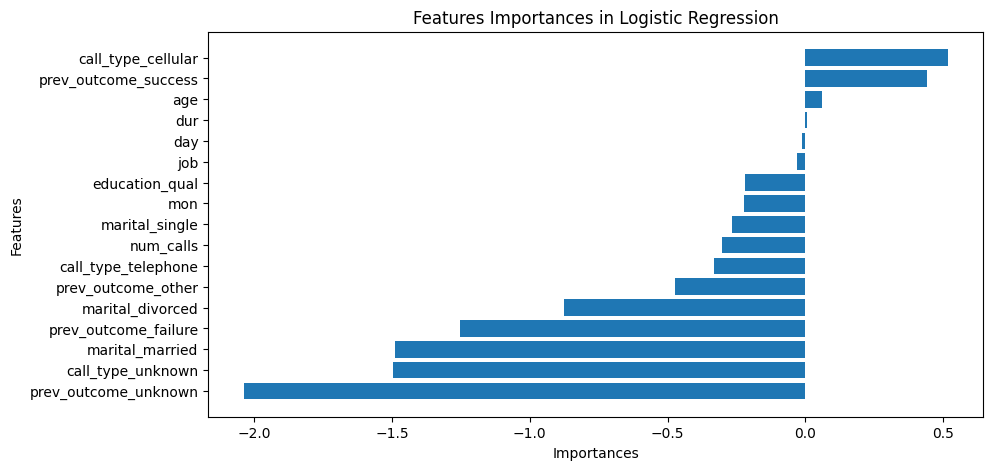

In [ ]:
sorted_index = lrc.coef_[0].argsort()
plt.figure(figsize=(10,5))
plt.barh(X.columns[sorted_index],lrc.coef_[0][sorted_index])
plt.title("Features Importances in Logistic Regression")
plt.xlabel("Importances")
plt.ylabel("Features")
plt.show()

###**K Nearest Neighbor Classifier** 

####**Choosing the best K(neighbor) Value**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
cross_val_score_knn = []
for k in [1,10,20,30,40,50]:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train , y_train)
  print("k =",k,"cross_val_score =",cross_val_score(knn,X_train,y_train,cv = 10).mean())
  cross_val_score_knn.append(cross_val_score(knn,X_train,y_train,cv = 10).mean())
print("max cross_val_score is for", max(cross_val_score_knn) )  

k = 1 cross_val_score = 0.9301721439749608
k = 10 cross_val_score = 0.8900312989045384
k = 20 cross_val_score = 0.8694992175273866
k = 30 cross_val_score = 0.8558215962441315
k = 40 cross_val_score = 0.8460563380281689
k = 50 cross_val_score = 0.8384976525821596
max cross_val_score is for 0.9301721439749608


At n_neighbors = 1 we get maximum cross_val_score

####**Implementing K Nearest Neighbor classification**

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train , y_train)
y_pred_knn = knn.predict(X_test)

###**Metrics in K Nearest Neighbor Classification** 

In [ ]:
testing_score_knn = knn.score(X_test, y_test) #accuracy
print("testing score for KNN :",testing_score_knn)
training_score_knn = knn.score(X_train, y_train)
print("training score for KNN :",training_score_knn)
cross_val_score_knn = cross_val_score(knn,X_train,y_train,cv=10).mean()
print("cross_val_score score for KNN :",cross_val_score_knn)
conf_knn = confusion_matrix(y_test,y_pred_knn)
print("confusion matrix for KNN :",conf_knn)
accuracy_score_knn = accuracy_score(y_test,y_pred_knn)
print("accuracy score for KNN :",accuracy_score_knn)
roc_auc_score_knn = roc_auc_score(y_test,knn.predict_proba(X_test)[:,1])
print("roc_auc_score for KNN :",roc_auc_score_knn)
precision_score_knn = precision_score(y_test,y_pred_knn)
print("precision_score for KNN :",precision_score_knn)
recall_score_knn = recall_score(y_test,y_pred_knn)
print("recall_score for KNN :",recall_score_knn)
f1_score_knn = f1_score(y_test,y_pred_knn)
print("f1_score for KNN :",f1_score_knn)

testing score for KNN : 0.8234708549939166
training score for KNN : 1.0
cross_val_score score for KNN : 0.9301721439749608
confusion matrix for KNN : [[6941 1025]
 [ 571  504]]
accuracy score for KNN : 0.8234708549939166
roc_auc_score for KNN : 0.670082676958469
precision_score for KNN : 0.3296272073250491
recall_score for KNN : 0.4688372093023256
f1_score for KNN : 0.38709677419354843


In [ ]:
from sklearn.metrics import classification_report
classification_report_knn = classification_report(y_test,y_pred_knn)
print(classification_report_knn)

              precision    recall  f1-score   support

           0       0.92      0.87      0.90      7966
           1       0.33      0.47      0.39      1075

    accuracy                           0.82      9041
   macro avg       0.63      0.67      0.64      9041
weighted avg       0.85      0.82      0.84      9041



###**Decision Tree Classifier**

####**Choosing the best of depth Value**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
cross_val_score_dtc = []
for k in range(1,20):
  dtc = DecisionTreeClassifier(max_depth = k,random_state = 0)
  dtc.fit(X_train , y_train)
  print("k =",k,"cross_val_score =",cross_val_score(dtc,X_train,y_train,cv = 10).mean())
  cross_val_score_dtc.append(cross_val_score(dtc,X_train,y_train,cv = 10).mean())
print("max cross_val_score is for", max(cross_val_score_dtc) )  

k = 1 cross_val_score = 0.7216744913928013
k = 2 cross_val_score = 0.7842723004694836
k = 3 cross_val_score = 0.8215492957746479
k = 4 cross_val_score = 0.8478716744913928
k = 5 cross_val_score = 0.8722535211267607
k = 6 cross_val_score = 0.8834115805946793
k = 7 cross_val_score = 0.8884350547730829
k = 8 cross_val_score = 0.8960093896713616
k = 9 cross_val_score = 0.9038028169014085
k = 10 cross_val_score = 0.9068231611893584
k = 11 cross_val_score = 0.912112676056338
k = 12 cross_val_score = 0.914413145539906
k = 13 cross_val_score = 0.9168701095461659
k = 14 cross_val_score = 0.9181377151799687
k = 15 cross_val_score = 0.9185133020344288
k = 16 cross_val_score = 0.9192331768388107
k = 17 cross_val_score = 0.9192331768388107
k = 18 cross_val_score = 0.9192801251956182
k = 19 cross_val_score = 0.9192488262910798
max cross_val_score is for 0.9192801251956182


At max_depth = 18 we get maximum cross_val_score

####**Implementing Decision Tree Classifier**

In [ ]:
dtc = DecisionTreeClassifier(max_depth = 18, random_state = 0)
dtc.fit(X_train , y_train)
y_pred_dtc = dtc.predict(X_test)

###**Metrics in Decision Tree Classifier**

In [ ]:
testing_score_dtc = dtc.score(X_test, y_test) #accuracy
print("testing score for dtc :",testing_score_dtc)
training_score_dtc = dtc.score(X_train, y_train)
print("training score for dtc :",training_score_dtc)
cross_val_score_dtc = cross_val_score(dtc,X_train,y_train,cv=10).mean()
print("cross_val_score score for dtc :",cross_val_score_dtc)
conf_dtc = confusion_matrix(y_test,y_pred_dtc)
print("confusion matrix for dtc :",conf_dtc)
accuracy_score_dtc = accuracy_score(y_test,y_pred_dtc)
print("accuracy score for dtc :",accuracy_score_dtc)
roc_auc_score_dtc = roc_auc_score(y_test,dtc.predict_proba(X_test)[:,1])
print("roc_auc_score for dtc :",roc_auc_score_dtc)
precision_score_dtc = precision_score(y_test,y_pred_dtc)
print("precision_score for dtc :",precision_score_dtc)
recall_score_dtc = recall_score(y_test,y_pred_dtc)
print("recall_score for dtc :",recall_score_dtc)
f1_score_dtc = f1_score(y_test,y_pred_dtc)
print("f1_score for dtc :",f1_score_dtc)

testing score for dtc : 0.8646167459351841
training score for dtc : 0.9908607198748044
cross_val_score score for dtc : 0.9192801251956182
confusion matrix for dtc : [[7277  689]
 [ 535  540]]
accuracy score for dtc : 0.8646167459351841
roc_auc_score for dtc : 0.7182055713526674
precision_score for dtc : 0.43938161106590723
recall_score for dtc : 0.5023255813953489
f1_score for dtc : 0.46875000000000006


In [ ]:
from sklearn.metrics import classification_report
classification_report_dtc = classification_report(y_test,y_pred_dtc)
print(classification_report_dtc)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      7966
           1       0.44      0.50      0.47      1075

    accuracy                           0.86      9041
   macro avg       0.69      0.71      0.70      9041
weighted avg       0.87      0.86      0.87      9041



[Text(0.5, 0.8333333333333334, 'dur <= 250.5\ngini = 0.5\nsamples = 63900\nvalue = [31950, 31950]'),
 Text(0.25, 0.5, 'prev_outcome_unknown <= 0.5\ngini = 0.393\nsamples = 30784\nvalue = [22525, 8259]'),
 Text(0.125, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.375, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.75, 0.5, 'call_type_unknown <= 0.5\ngini = 0.407\nsamples = 33116\nvalue = [9425, 23691]'),
 Text(0.625, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.875, 0.16666666666666666, '\n  (...)  \n')]

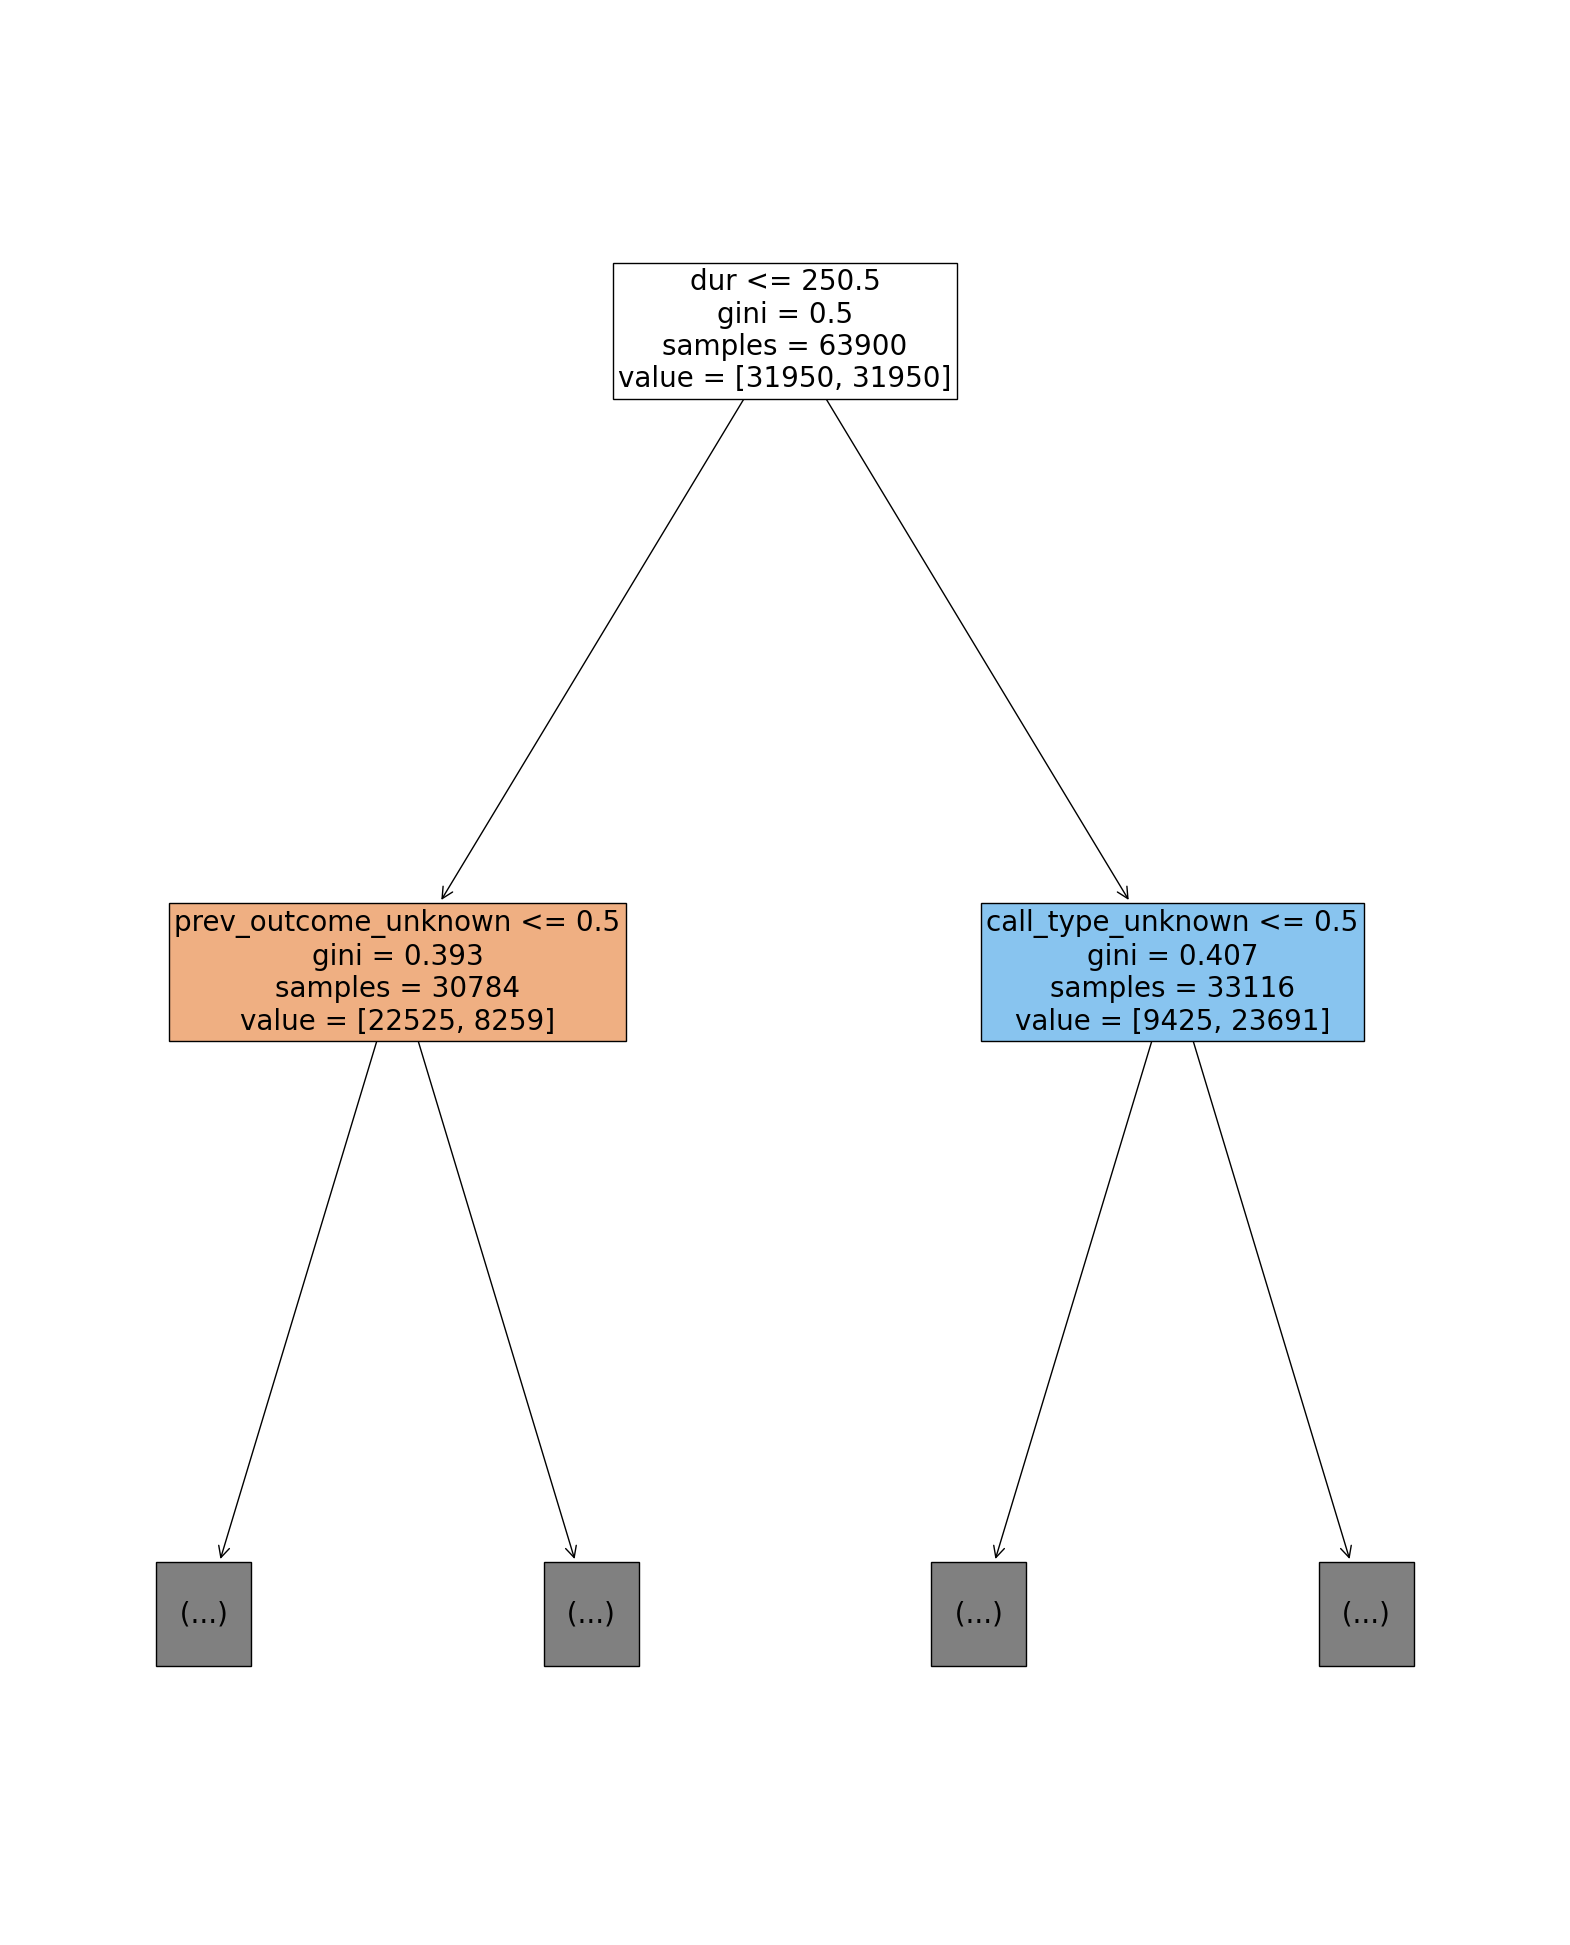

In [ ]:
from sklearn.tree import plot_tree
features = X.columns
plt.figure(figsize = (20,25))
plot_tree(dtc,max_depth = 1, filled = True, fontsize = 20, feature_names = features)

###**Feature Importance in Decision Tree Classifier**

In [ ]:
dtc.feature_importances_

array([0.05025661, 0.02740201, 0.01763496, 0.05826607, 0.09541311,
       0.33422033, 0.01568405, 0.01233537, 0.01330012, 0.01038583,
       0.00901254, 0.00753896, 0.07623572, 0.09054795, 0.04870532,
       0.00471579, 0.12834526])

In [ ]:
feat_dtc = list(zip(dtc.feature_importances_, X.columns))
feat_impo_dtc = pd.DataFrame(feat_dtc, columns = ["Importances","Features"])
feat_impo_dtc.sort_values("Importances", ascending = False, inplace =True)
feat_impo_dtc

,Importances,Features
5,0.334220,dur
16,0.128345,prev_outcome_unknown
4,0.095413,mon
13,0.090548,prev_outcome_failure
12,0.076236,call_type_unknown
3,0.058266,day
0,0.050257,age
14,0.048705,prev_outcome_other
1,0.027402,job
2,0.017635,education_qual


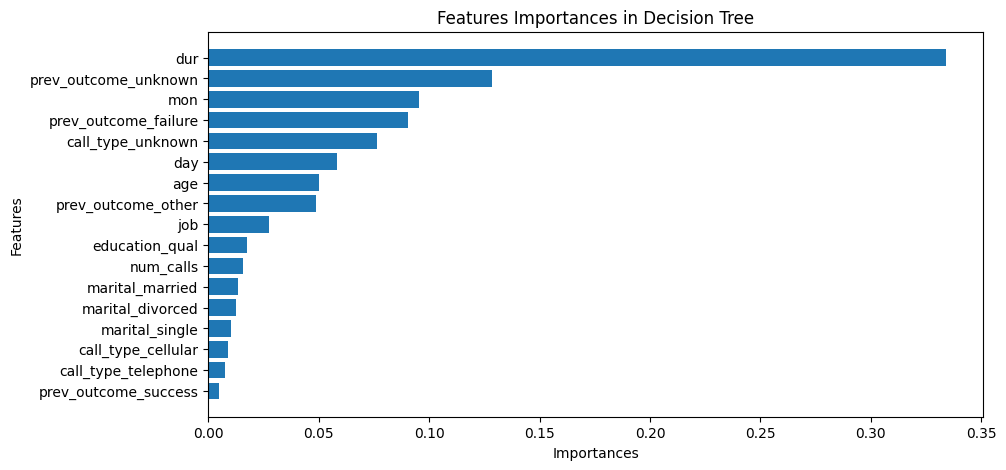

In [ ]:
sorted_index = dtc.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(X.columns[sorted_index],dtc.feature_importances_[sorted_index])
plt.title("Features Importances in Decision Tree")
plt.xlabel("Importances")
plt.ylabel("Features")
plt.show()

###**Random Forest Classifier**

####**Choosing the best n_estimators**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
cross_val_score_rfc = []
n = [100,200,300, 400,500]
for k in n:
  rfc = RandomForestClassifier(n_estimators = k,random_state = 0)
  rfc.fit(X_train , y_train)
  print("k =",k,"cross_val_score =",cross_val_score(rfc,X_train,y_train,cv = 10).mean())
  cross_val_score_rfc.append(cross_val_score(rfc,X_train,y_train,cv = 10).mean())
print("max cross_val_score is for", max(cross_val_score_rfc) ) 

k = 100 cross_val_score = 0.9400625978090767
k = 200 cross_val_score = 0.9404068857589986
k = 300 cross_val_score = 0.9402034428794993
k = 400 cross_val_score = 0.9403286384976527
k = 500 cross_val_score = 0.940359937402191
max cross_val_score is for 0.9404068857589986


At n_estimaors = 200 we get maximum cross_val_score

####**Implementing Random Forest Classifier**

In [ ]:
rfc = RandomForestClassifier(n_estimators = 200, random_state = 0)
rfc.fit(X_train , y_train)
y_pred_rfc = rfc.predict(X_test)

###**Metrics in Random Forest Classifier**

In [ ]:
testing_score_rfc = rfc.score(X_test, y_test) #accuracy
print("testing score for rfc :",testing_score_rfc)
training_score_rfc = rfc.score(X_train, y_train)
print("training score for rfc :",training_score_rfc)
cross_val_score_rfc = cross_val_score(rfc,X_train,y_train,cv=10).mean()
print("cross_val_score score for rfc :",cross_val_score_rfc)
conf_rfc = confusion_matrix(y_test,y_pred_rfc)
print("confusion matrix for rfc :",conf_rfc)
accuracy_score_rfc = accuracy_score(y_test,y_pred_rfc)
print("accuracy score for rfc :",accuracy_score_rfc)
roc_auc_score_rfc = roc_auc_score(y_test,rfc.predict_proba(X_test)[:,1])
print("roc_auc_score for rfc :",roc_auc_score_rfc)
precision_score_rfc = precision_score(y_test,y_pred_rfc)
print("precision_score for rfc :",precision_score_rfc)
recall_score_rfc = recall_score(y_test,y_pred_rfc)
print("recall_score for rfc :",recall_score_rfc)
f1_score_rfc = f1_score(y_test,y_pred_rfc)
print("f1_score for rfc :",f1_score_rfc)

testing score for rfc : 0.8902776241566198
training score for rfc : 1.0
cross_val_score score for rfc : 0.9404068857589986
confusion matrix for rfc : [[7513  453]
 [ 539  536]]
accuracy score for rfc : 0.8902776241566198
roc_auc_score for rfc : 0.9171944134665351
precision_score for rfc : 0.5419615773508595
recall_score for rfc : 0.4986046511627907
f1_score for rfc : 0.5193798449612402


In [ ]:
from sklearn.metrics import classification_report
classification_report_rfc = classification_report(y_test,y_pred_rfc)
print(classification_report_rfc)

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      7966
           1       0.54      0.50      0.52      1075

    accuracy                           0.89      9041
   macro avg       0.74      0.72      0.73      9041
weighted avg       0.89      0.89      0.89      9041



###**Feature Importance in Random Forest Classifier**

In [ ]:
rfc.feature_importances_

array([0.06359644, 0.0544479 , 0.03664504, 0.05971941, 0.10771505,
       0.30251297, 0.0319709 , 0.0200884 , 0.03087865, 0.02406403,
       0.01522522, 0.0107958 , 0.060754  , 0.05599302, 0.02187116,
       0.00523912, 0.0984829 ])

In [ ]:
feat_rfc = list(zip(rfc.feature_importances_, X.columns))
feat_impo_rfc = pd.DataFrame(feat_rfc, columns = ["Importances","Features"])
feat_impo_rfc.sort_values("Importances", ascending = False, inplace =True)
feat_impo_rfc

,Importances,Features
5,0.302513,dur
4,0.107715,mon
16,0.098483,prev_outcome_unknown
0,0.063596,age
12,0.060754,call_type_unknown
3,0.059719,day
13,0.055993,prev_outcome_failure
1,0.054448,job
2,0.036645,education_qual
6,0.031971,num_calls


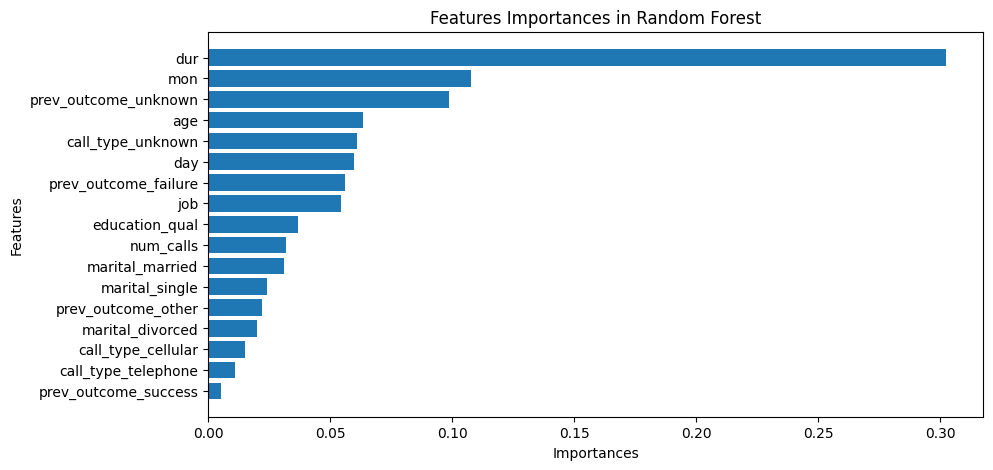

In [ ]:
sorted_index = rfc.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(X.columns[sorted_index],rfc.feature_importances_[sorted_index])
plt.title("Features Importances in Random Forest")
plt.xlabel("Importances")
plt.ylabel("Features")
plt.show()

###**Extreme Gradient Boosting Classifier**

In [ ]:
from xgboost import XGBClassifier
xgb  = XGBClassifier()

####**Choosing the best Learning Rate, best max_depth, best n_estimators** 

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':[100,200,500],
              'learning_rate':[0.01,0.05,0.1],
              'max_depth': range(1,11)}
grid_search = GridSearchCV(estimator = xgb, param_grid = param_grid, cv = 5)
grid_search.fit(X_train,y_train)  
print('Best max_depth :', grid_search.best_params_['max_depth'])     
print('Best n_estimators :', grid_search.best_params_['n_estimators'])            
print('Best learning_rate :', grid_search.best_params_['learning_rate'])

Best max_depth : 10
Best n_estimators : 500
Best learning_rate : 0.1


####**Implementing Extreme Gradient Boosting Classifier**

In [ ]:
best_xgb = XGBClassifier(learning_rate = grid_search.best_params_['learning_rate'],
n_estimators = grid_search.best_params_['n_estimators'],
max_depth  = grid_search.best_params_['max_depth'])
best_xgb.fit(X_train , y_train)
y_pred_xgb = best_xgb.predict(X_test)

####**Metrics in Extreme Gradient Boosting Classifier**

In [ ]:
testing_score_xgb = best_xgb.score(X_test, y_test) #accuracy
print("testing score for xgb :",testing_score_xgb)
training_score_xgb = best_xgb.score(X_train, y_train)
print("training score for xgb :",training_score_xgb)
cross_val_score_xgb = cross_val_score(best_xgb,X_train,y_train,cv=10).mean()
print("cross_val_score score for xgb :",cross_val_score_xgb)
conf_xgb = confusion_matrix(y_test,y_pred_xgb)
print("confusion matrix for xgb :",conf_xgb)
accuracy_score_xgb = accuracy_score(y_test,y_pred_xgb)
print("accuracy score for xgb :",accuracy_score_xgb)
roc_auc_score_xgb = roc_auc_score(y_test,best_xgb.predict_proba(X_test)[:,1])
print("roc_auc_score for xgb :",roc_auc_score_xgb)
precision_score_xgb = precision_score(y_test,y_pred_xgb)
print("precision_score for xgb :",precision_score_xgb)
recall_score_xgb = recall_score(y_test,y_pred_xgb)
print("recall_score for xgb :",recall_score_xgb)
f1_score_xgb = f1_score(y_test,y_pred_xgb)
print("f1_score for xgb :",f1_score_xgb)

testing score for xgb : 0.8960292003097002
training score for xgb : 0.9983411580594679
cross_val_score score for xgb : 0.9407981220657277
confusion matrix for xgb : [[7519  447]
 [ 493  582]]
accuracy score for xgb : 0.8960292003097002
roc_auc_score for xgb : 0.9175525051235192
precision_score for xgb : 0.565597667638484
recall_score for xgb : 0.5413953488372093
f1_score for xgb : 0.553231939163498


In [ ]:
from sklearn.metrics import classification_report
classification_report_xgb = classification_report(y_test,y_pred_xgb)
print(classification_report_xgb)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7966
           1       0.57      0.54      0.55      1075

    accuracy                           0.90      9041
   macro avg       0.75      0.74      0.75      9041
weighted avg       0.89      0.90      0.90      9041



####**Feature Importance in Extreme Gradient Boosting Classifier**

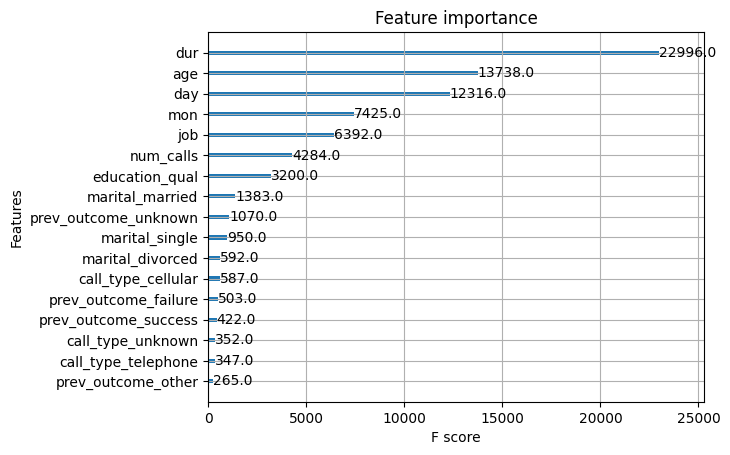

In [ ]:
from xgboost import plot_importance
plot_importance(best_xgb)
plt.show()

###**Choosing the Best roc_auc_score among all the above Machine Learning Models** 

In [ ]:
print("roc_auc_score for logistic regression :",roc_auc_score_lrc)
print("roc_auc_score for KNN :",roc_auc_score_knn)
print("roc_auc_score for dtc :",roc_auc_score_dtc)
print("roc_auc_score for rfc :",roc_auc_score_rfc)
print("roc_auc_score for xgb :",roc_auc_score_xgb)

roc_auc_score for logistic regression : 0.8739327023571106
roc_auc_score for KNN : 0.670082676958469
roc_auc_score for dtc : 0.7182055713526674
roc_auc_score for rfc : 0.9171944134665351
roc_auc_score for xgb : 0.9175525051235192


##**Why we choose roc_auc_score as best metrics in this Problem???**



In the context of an insurance policy problem, the TPR represents the proportion of customers who actually take out a policy that are correctly identified as likely to take out a policy by the model. The FPR represents the proportion of customers who do not take out a policy that are incorrectly identified as likely to take out a policy by the model.

By using the ROC AUC score as an evaluation metric, we can assess the overall performance of a binary classification model in predicting whether a customer will take out an insurance policy or not, taking into account both the TPR and the FPR. A higher ROC AUC score indicates a better performance of the model in distinguishing between customers who take out a policy and those who do not.

Therefore, the ROC AUC score is a useful metric in insurance policy problems because it provides a measure of the overall performance of a binary classification model in predicting whether a customer will take out an insurance policy or not, which is a key factor in determining the risk and profitability of an insurance policy.

Among all the models above executed like logistic regression, KNN, Decision Tree Classifier, Random Forest Classifier, Extreme Gradient Boosting Classifier ----Extreme Gradient Boosting Classifier has High roc_auc_score.So we conclude that Extreme Boosting Classifier is the best model in predicting a client will subscribe to the insurance.

Based on the **feature importance** given by Best Machine Learning
Algorithm(**Extreme Gradient Boosting**)-the insurance company should focus on the below features if a client will subscribe to the insurance or not.



1.   Duration,
2.   Age,
3.   Day,
4.   Month,
5.   Job,
6.   Number of calls,
7.   Educational Qualification,
8.   Marital status (married).
